<a href="https://colab.research.google.com/github/Sagarjain93/car_prices/blob/main/car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Exploratory Data Analysis on Sales of Car Dataset**

##**1.Introduction**

This Exploratory Data Analysis (EDA) provides a clear overview of the car sales dataset, which includes important details such as car brand, model, manufacturing year, price, fuel type, transmission, and mileage. The primary goal is to uncover actionable insights that help us understand customer preferences, market trends, and factors driving sales performance.

Through careful data cleaning and visualization, we highlight key patterns and relationships that influence buying decisions and pricing. These insights will support strategic business decisions, improve sales forecasting, and identify opportunities for growth in a competitive automotive market. Ultimately, this analysis forms a data-driven foundation for optimizing marketing strategies and enhancing overall business performance.

we hypothesize that

  1.Higher car mileage (odometer) leads to lower selling prices.
  Rationale: Cars with more wear and tear are typically valued less.

  2.Cars in better condition sell for higher prices.
  Rationale: Buyers are willing to pay more for well-maintained vehicles.

  3.Certain brands (e.g., Toyota, Honda) retain value better than others.
  Rationale: Some brands are known for reliability and resale value.

  4.Automatic transmission cars sell for higher prices than manual ones.
  Rationale: Automatic vehicles are more popular and convenient for most buyers.

  5.Newer model years are associated with higher selling prices.
  Rationale: Newer vehicles have updated features and less wear.

  6.MMR (market value estimate) is positively correlated with actual selling price.
  Rationale: MMR is a pricing benchmark and should closely match real transactions.

  7.SUVs and trucks have higher average selling prices than sedans and hatchbacks.
  Rationale: Larger vehicles are generally more expensive.

  8.Sales volume or price varies by state due to demand or regional preferences.
  Rationale: Certain states may have more active used car markets or different price trends.

  9.Cars sold in winter months have lower prices compared to summer months.
  Rationale: Consumer demand may fluctuate seasonally.

  10.Dealer (seller) has an impact on selling price even for similar models.
  Rationale: Some dealers may offer better deals or add premiums.

##**2.Dataset Description**

The car sales dataset contains detailed information on vehicle listings and sales transactions. The key attributes included are:

* **Year:** The model year of the vehicle.

* **Make:** The manufacturer or brand of the car (e.g., Toyota, Ford).

* **Model:** The specific model name of the vehicle.

* **Trim:** The variant or version of the model, indicating different features or packages.

* **Body:** The body style of the vehicle (e.g., sedan, SUV, coupe).

* **Transmission:** The type of transmission system (e.g., automatic, manual).

* **VIN:** The unique Vehicle Identification Number, used to track individual cars.

* **State**: The U.S. state where the vehicle was sold or listed.

* **Condition**: The overall condition rating of the vehicle (e.g., excellent, good, fair).

* **Odometer:** The mileage on the vehicle at the time of sale, measured in miles.

* **Color**: The exterior color of the vehicle.

* **Interior**: The interior color or material of the vehicle.

* Seller: The entity or dealership selling the car.

* **MMR (Manheim Market Report)**: The wholesale market value estimate for the vehicle.

* **Selling Price:** The final sale price of the vehicle.

* **Sale Date:** The date when the sale transaction occurred.

This dataset provides a comprehensive view of car sales transactions, enabling analysis of price trends, vehicle popularity, market conditions, and sales performance across different regions and time periods.



#**3. Import Required Libraries**
We import Python libraries necessary for data manipulation and visualization

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.palettes.SEABORN_PALETTES.keys()

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**4. Load The Dataset**
To begin the analysis, the car sales dataset is loaded directly from Google Drive. This approach ensures convenient access to the data stored in the cloud, especially when working in collaborative or cloud-based environments like Google Colab. By mounting Google Drive or using a shareable link, we can seamlessly import the dataset into our workspace for further processing and analysis.



In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/6_Sales/car/car_prices.csv')

#**5. Initial Data Inspection**
In this step, we perform an initial examination of the dataset to understand its structure and quality. This includes previewing sample records, checking the dataset’s size, identifying data types, and detecting missing or duplicate values. These insights help inform subsequent data cleaning and analysis steps.

#**5.1. Preview First Few Records**
Display the first 5 rows to get an initial idea of the dataset.

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Display the last 5 rows to get an initial idea of the dataset

In [ ]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


#**5.2. Check The Dataset Shape**
Check the number of rows and columns in the datase

In [ ]:
df.shape

(558837, 16)

#**5.3 Dataset Summary Overview**
Check for missing values and data types of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


**Interpretation** The car sales dataset includes 558,837 records with 16 columns detailing vehicle specs like year, make, model, body type, transmission, mileage, condition, and selling price. Most key fields are complete, though transmission, body, and trim have moderate missing values. The saledate column needs conversion to datetime for temporal analysis. Overall, the dataset is well-structured for exploring pricing trends, brand performance, and sales patterns across U.S. states.

#**5.4. Statistical Summary of Numeric Columns**
Generate descriptive statistics such as mean, standard deviation, min, max, and quartiles for numerical columns.

In [ ]:
df.select_dtypes(include='number').describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


#**5.5 Statistical Summary of Object Columns**
A statistical summary includes the count, number of unique values, most frequent value (top), and frequency of the top value for each categorical column.

In [ ]:
df.select_dtypes(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,white,black,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,white,beige,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,gray,black,financial services remarketing (lease),Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,white,black,volvo na rep/world omni,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,gray,black,financial services remarketing (lease),Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...
558832,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,silver,black,avis corporation,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,white,black,i -5 uhlmann rv,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,black,black,financial services remarketing (lease),Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,white,black,enterprise vehicle exchange / tra / rental / t...,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#**6. Data Cleaning/Preprocessing**
In this section, we assess the integrity and quality of the car sales dataset by examining the completeness, consistency, and data types of each column. We identify missing values, check for correct data types, and verify that the data aligns with expected formats and ranges. This validation ensures that subsequent analyses are based on reliable and accurate data.

## **6.1 Fix Data types**

In this section, we assess we will change the data type of saledate from object to datetime format.

In [ ]:
# Format string for: Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
df['saledate'] = pd.to_datetime(df['saledate'], format='%a %b %d %Y %H:%M:%S GMT%z', errors='coerce')
df['saledate'] = pd.to_datetime(df['saledate'].dt.date)  # Keep only date, remove time


## **6.2 Handling Missing Values**

We start by identifying and handling any missing values. This ensures the analysis isn't skewed by incomplete data.

In [ ]:
# Check for missing values
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


The dataset has minimal missing values overall, with transmission, trim, and body showing the highest null counts. Key variables like sellingprice, odometer, and saledate are nearly complete and suitable for analysis after basic cleaning.

##**6.3. Dropping All Null rows**

In [ ]:
# Drop rows with missing 'sellingprice' or 'saledate'
df.dropna(subset=['sellingprice', 'saledate'], inplace=True)

# Fill categorical nulls with 'Unknown'
cat_cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Fill numerical nulls with median
df['condition'] = df['condition'].fillna(df['condition'].median())
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['mmr'] = df['mmr'].fillna(df['mmr'].median())

# Drop VIN column only if it exists
if 'vin' in df.columns:
    df.drop(columns=['vin'], inplace=True)

# Convert saledate to datetime and extract parts
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df['saledate'] = pd.to_datetime(df['saledate'].dt.date)
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month


## **6.4. Handle Duplicate Records**

Duplicate records can bias the analysis. We check for and remove any duplicates if found.

In [ ]:
# Check for duplicate records
df.duplicated().sum()

np.int64(0)

**Interpretation:** There are no duplicate records in the dataset. This means that we don't need to remove any records before analyzing the dataset.

## **6.5. Standardize Column Names**

To make column names easier to work with, we convert them to lowercase and replace spaces with underscores.


In [ ]:
# Check column names to see if they are consistent
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'sale_year', 'sale_month'],
      dtype='object')

##**6.6. Identify Numerical and Categorical Columns**
We categorize columns into numerical and categorical groups to streamline further analysis. This enables targeted handling during cleaning, visualization, and modeling.

In [ ]:
# Identify categorical and numerical columns for targeted processing
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Display categorical columns
list(categorical_cols)

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'color',
 'interior',
 'seller']

In [ ]:
# Display numerical columns
list(numerical_cols)

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [ ]:
df['saledate'].dtype

dtype('<M8[ns]')

##**6.7. Standardize Categorical Features and Explore Unique Values**

###**6.7. A. Explore Unique Values in Categorical Features**

In [ ]:
# Display unique values for each categorical feature

for col in categorical_cols:
  print(f"Unique values in {col}:")
  print(df[col].unique())
  print("\n")

Unique values in make:
[]


Unique values in model:
[]


Unique values in trim:
[]


Unique values in body:
[]


Unique values in transmission:
[]


Unique values in state:
[]


Unique values in color:
[]


Unique values in interior:
[]


Unique values in seller:
[]




## **6.8. Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

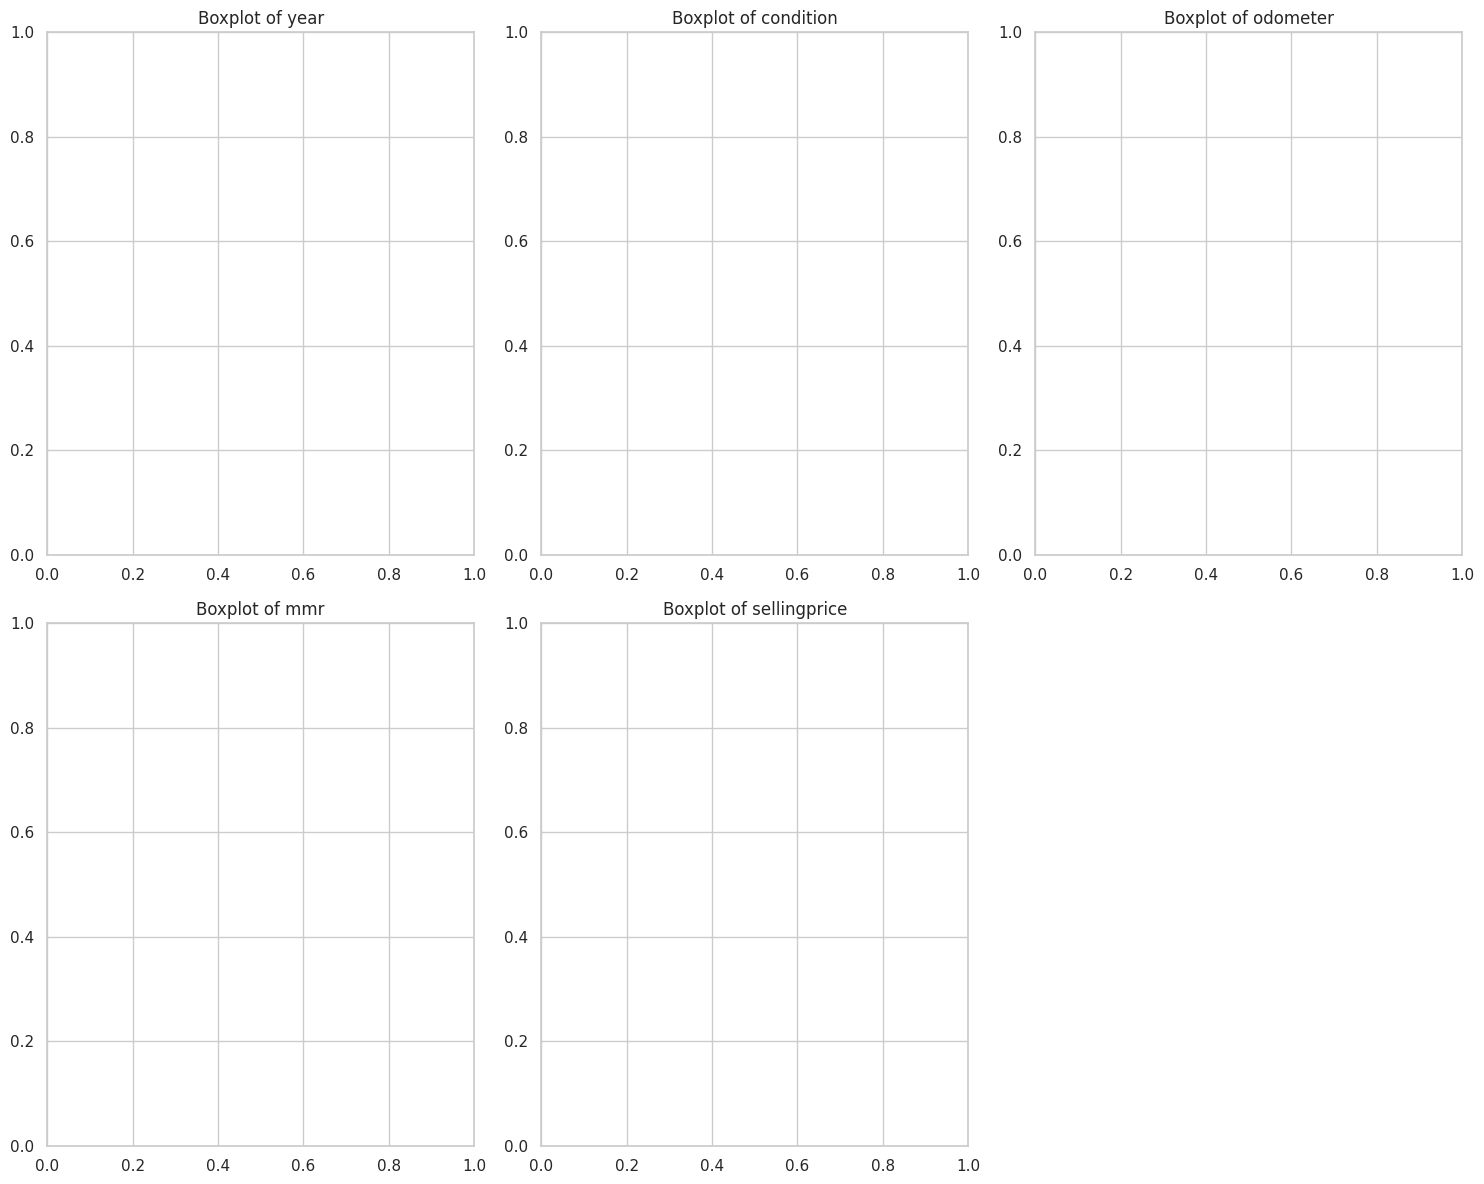

In [ ]:
import math

# Assume numerical_cols is a list of your numerical columns
num_plots = len(numerical_cols)

# Automatically calculate rows and columns (e.g., 3 columns per row)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(5 * cols, 6 * rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color="red")
    plt.title(f"Boxplot of {col}")
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


**Interpretations**

**YEAR** - Most of the cars are from 2005 to 2015 ,several cars with year before 2000 , and outlier as close to 1980s.

**CONDITION** - The condition range is from 20 - 45 , with few entries close to 0 and above 47.

**ODOMETER** - Most of car driven are below 2,00,000 . But there are extreme outliers upto 10,00,0000.

**MMR** - Highly skewed with large quantity of low values and there are few outliers above 1,75,000.

**SELLING PRICE** - Most of the car values is below 50,000 , but there are some car that go above 2,00,000

##**6.9. B. Statistical Detection of Outliers using IQR**
In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # print(f"\n{column}:")
    # # print(f"  IQR = {IQR:.2f}")
    # print(f"  Outlier lower bound: {lower_bound:.2f}")
    # print(f"  Outlier upper bound: {upper_bound:.2f}")
    # print(f"  Number of outliers: {outliers.shape[0]}")

    return outliers

    # Loop through numerical columns and report number of outliers in each
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}:      {len(outliers)} outliers detected")


year:      0 outliers detected
condition:      0 outliers detected
odometer:      0 outliers detected
mmr:      0 outliers detected
sellingprice:      0 outliers detected


#**7. Exploratory Data Analysis - Visualization and Insights**

Moving forward, we will enhance our visual analysis by exploring deeper patterns and relationships within the data. This includes identifying how different features interact with each other and influence key outcomes, such as pricing. We will also aim to uncover any hidden trends or group-level behaviors that may not be immediately visible through basic plots. These visual insights will guide our understanding of the data and support the next steps in modeling and decision-making.

##**7.1. Univariate Analysis**
Univariate Analysis help understand the distribution and characteristics of individual variables within the dataset. In this step, we explore each feature independently to identify patterns, dominant categories, central tendency, spread, and potential anomalies.

###**Univariate Analysis - Categorical Features**

####**Chart 1 - Distribution of cars by State**

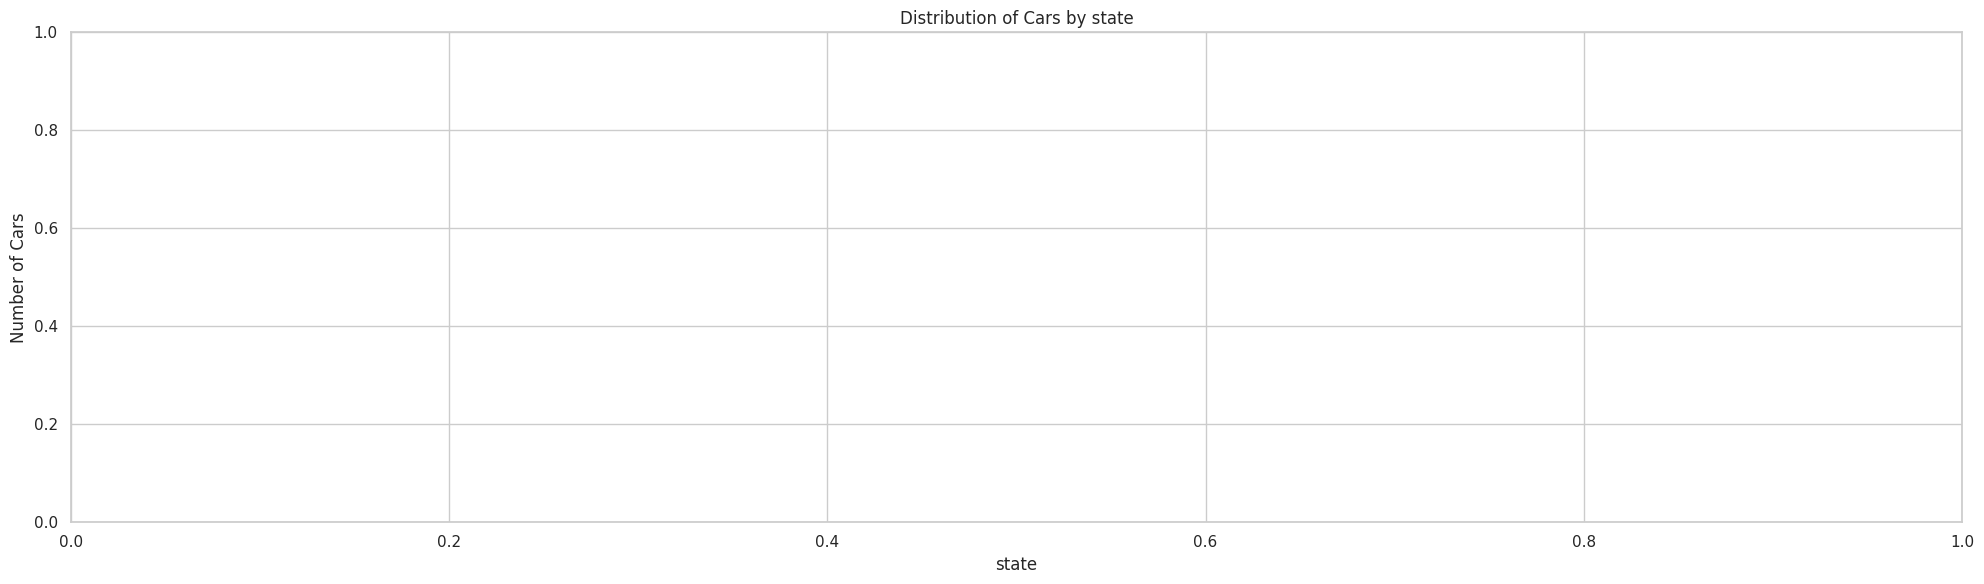

In [ ]:
# Univariate analysis of state
plt.figure(figsize=(20, 6))
sns.countplot(x='state', data=df, order=sorted(df['state'].dropna().unique()),palette='Set1',hue='state',legend=False)
plt.title('Distribution of Cars by state')
plt.xlabel('state')
plt.ylabel('Number of Cars')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **Why was this specific chart chosen?**

A bar chart is ideal for comparing the frequency of a categorical variable — in this case, the number of cars sold across different U.S. states. It helps easily identify states with high or low activity in the dataset.



##### **What is/are the key insight(s) found from the chart?**

*  Florida (FL) and California (CA) have the highest number of cars sold — indicating major sales hubs.

*  States like PA (Pennsylvania), TX (Texas), and GA (Georgia) also show significant volume.

*  Several states (like ab, qc, pr, ns) have very few entries — possibly data errors or international entries (e.g., ab = Alberta, qc = Quebec, pr = Puerto Rico).

##### **Will the gained insights help in creating a positive business impact?**

*  States like FL, CA, TX, GA are clearly large markets, suggesting strong demand and active resale/trade.

*  These states can be targeted for promotions, partnerships, or dealership expansion.

*  High inventory areas help with data-rich pricing models and predictive modeling.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Potentially:

The presence of low-activity or foreign region codes (like ab, ns, qc) might indicate:

*  Dirty or incorrect data entries, which could impact analysis.

*  Wasted marketing efforts if misinterpreted as valid U.S. markets.

*  If sales teams are focusing on these low-value regions, it could lead to resource misallocation.

####**Chart 2 - Analysis of car Makes**

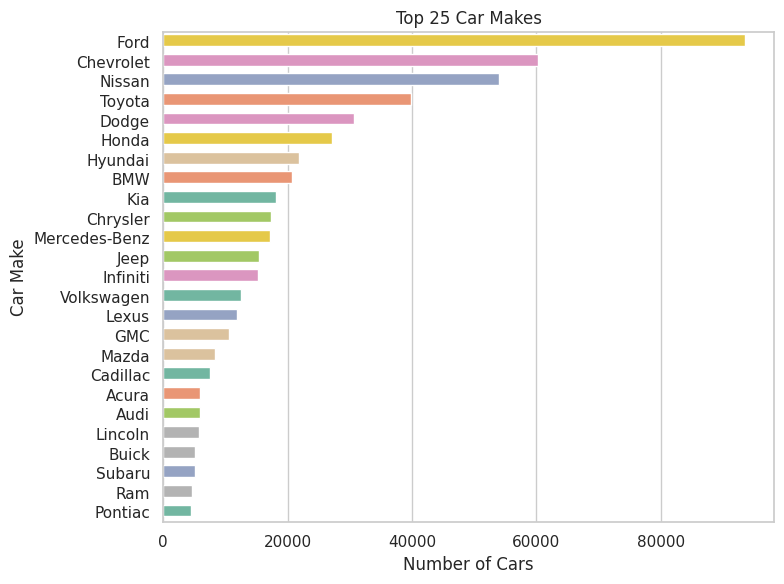

In [ ]:
#  Get top 25 car makes
top_25_makes = df['make'].value_counts().nlargest(25).index

#  Filter the DataFrame for top 25
df_top_25 = df[df['make'].isin(top_25_makes)]


plt.figure(figsize=(8, 6))
make_order = df_top_25['make'].value_counts().index

ax = sns.countplot(
    y='make',
    data=df_top_25,
    order=make_order,
    hue='make',
    palette='Set2',
    legend=False
)

# Optional spacing
for bar in ax.patches:
    bar.set_height(0.6)

plt.title('Top 25 Car Makes')
plt.xlabel('Number of Cars')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()


##### **Why was this specific chart chosen?**

A horizontal bar chart is ideal for showing the frequency distribution of categorical variables like car makes. Since there are many categories, horizontal bars provide better readability, especially for long labels like “Mercedes-Benz” or “Volkswagen”.

##### **What is/are the key insight(s) from the chart?**

*  Ford is the most frequently listed car make, followed by Chevrolet and Nissan.

*  These top 3 brands dominate the dataset in volume — each with over 50,000 listings.

*  There is a long tail of makes like Ram, Subaru, Buick, and Lincoln with significantly fewer listings.

*  “Unknown” also appears, suggesting some rows have missing or unclean make values.

##### **Will the gained insights help in creating a positive business impact?**

Yes:

Car marketplaces can prioritize Ford, Chevrolet, and Nissan for:

*  Optimizing inventory forecasting

*  Building custom recommendation systems

*  Launching targeted brand-based promotions or filters

*  Understanding most-listed brands helps in training better pricing models and customer trend analysis.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes, potentially:

The presence of “Unknown” values in the make column signals data quality issues, which:

*  May affect brand-level analysis

*  Could lead to incorrect filtering or model misclassifications

*  Overreliance on a few brands might lead to overfitting in machine learning models, and neglecting niche opportunities from lower-volume brands like Subaru or Lincoln.



####**Chart 3 - Sales of car with respect to body types**

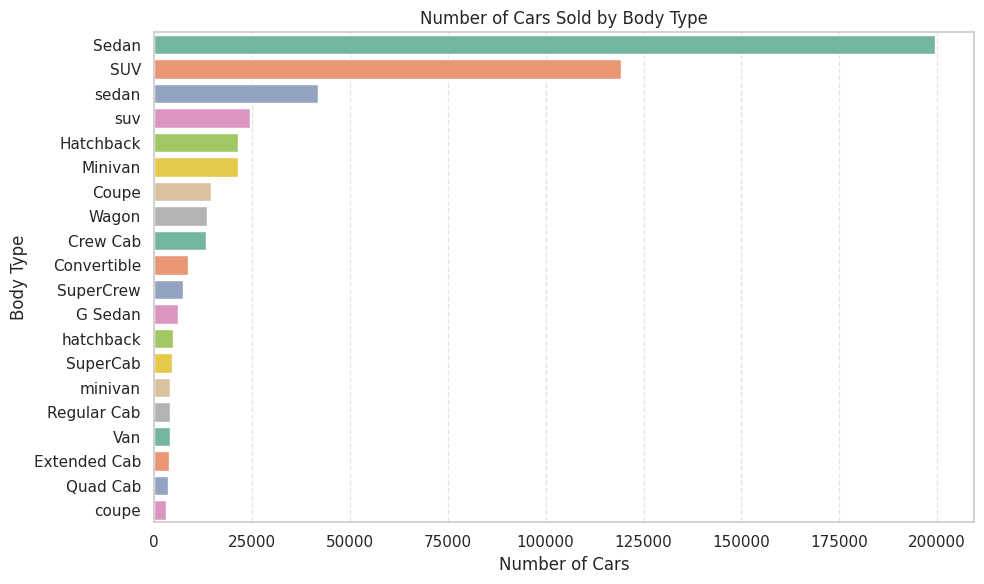

In [ ]:
# Step 1: Convert to DataFrame
df_top_bodies = top_bodies.reset_index()
df_top_bodies.columns = ['body', 'count']

# Step 2: Plot with hue and legend=False
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_bodies, x='count', y='body', hue='body', palette='Set2', dodge=False, legend=False)
plt.title("Number of Cars Sold by Body Type")
plt.xlabel("Number of Cars")
plt.ylabel("Body Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#####**Why was this specific chart chosen?**

A horizontal bar chart was chosen because:

*  It clearly displays the frequency distribution of a categorical variable (body)

*  It helps identify which body types dominate in the dataset

*  It's more readable when category names (like Extended Cab, SuperCrew) are long



##### **What is/are the key insight(s) from the chart?**


*  “Sedan” is by far the most sold body type, followed by SUV — these two dominate the market.

*  There are case inconsistencies like "Sedan" and "sedan", "SUV" and "suv", which are semantically the same but split in the chart.

*  Smaller segments like Coupe, Convertible, Minivan, and truck-style bodies (e.g., Crew Cab, SuperCrew) have relatively lower volumes.



##### **Will the insights help create a positive business impact?**

Yes.

*  Inventory Strategy: Dealerships and platforms can prioritize stocking Sedans and SUVs to meet high demand.

*  Marketing: Campaigns can focus on promoting diverse trims in high-demand body styles.

*  Data Cleaning: Identifying duplicate entries (e.g., "sedan" vs "Sedan") enables data standardization, improving model accuracy.

*  Category Filtering: Improves UX in apps/web by pre-populating filters for the most popular categories.



##### **Are there any insights that could lead to negative growth?**



Yes:

*  Case sensitivity issues (e.g., "sedan" vs "Sedan") can:

*  Cause incorrect aggregations

*  Lead to poor ML predictions or visualizations

*  Ignoring niche segments like Convertibles or Coupes might overlook profitable micro-markets, especially in luxury or seasonal segments.



####**Chart 4 - Transmission type**

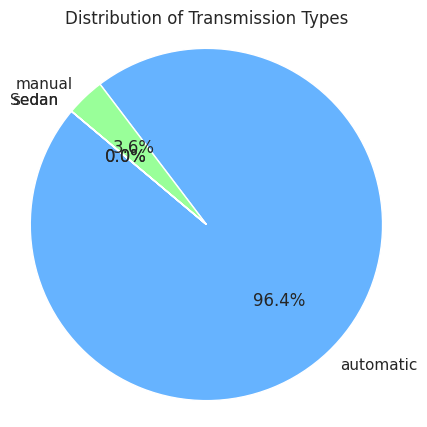

In [ ]:
# Count the frequency of each transmission type
transmission_counts = df['transmission'].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Distribution of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

##### **Why was this specific chart chosen?**

A pie chart is effective here because:

*  The variable transmission has very few unique categories (manual, automatic, unknown).

*  It highlights proportion/percentage dominance, which is useful for categorical comparisons when one group is much larger.

*  It immediately communicates how overwhelmingly one category dominates.



##### **What is/are the key insight(s) from the chart?**

*  “Sedan” is by far the most sold body type, followed by SUV — these two dominate the market.

*  There are case inconsistencies like "Sedan" and "sedan", "SUV" and "suv", which are semantically the same but split in the chart.

*  Smaller segments like Coupe, Convertible, Minivan, and truck-style bodies (e.g., Crew Cab, SuperCrew) have relatively lower volumes.



##### **Will the gained insights help in creating a positive business impact?**

Yes.

*  Inventory Strategy: Dealerships and platforms can prioritize stocking Sedans and SUVs to meet high demand.

*  Marketing: Campaigns can focus on promoting diverse trims in high-demand body styles.

*  Data Cleaning: Identifying duplicate entries (e.g., "sedan" vs "Sedan") enables data standardization, improving model accuracy.

*  Category Filtering: Improves UX in apps/web by pre-populating filters for the most popular categories.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes:

*  Case sensitivity issues (e.g., "sedan" vs "Sedan") can:

*  Cause incorrect aggregations

*  Lead to poor ML predictions or visualizations

*  Ignoring niche segments like Convertibles or Coupes might overlook profitable micro-markets, especially in luxury or seasonal segments.



####**Chart 5 - Vehicle Condition**

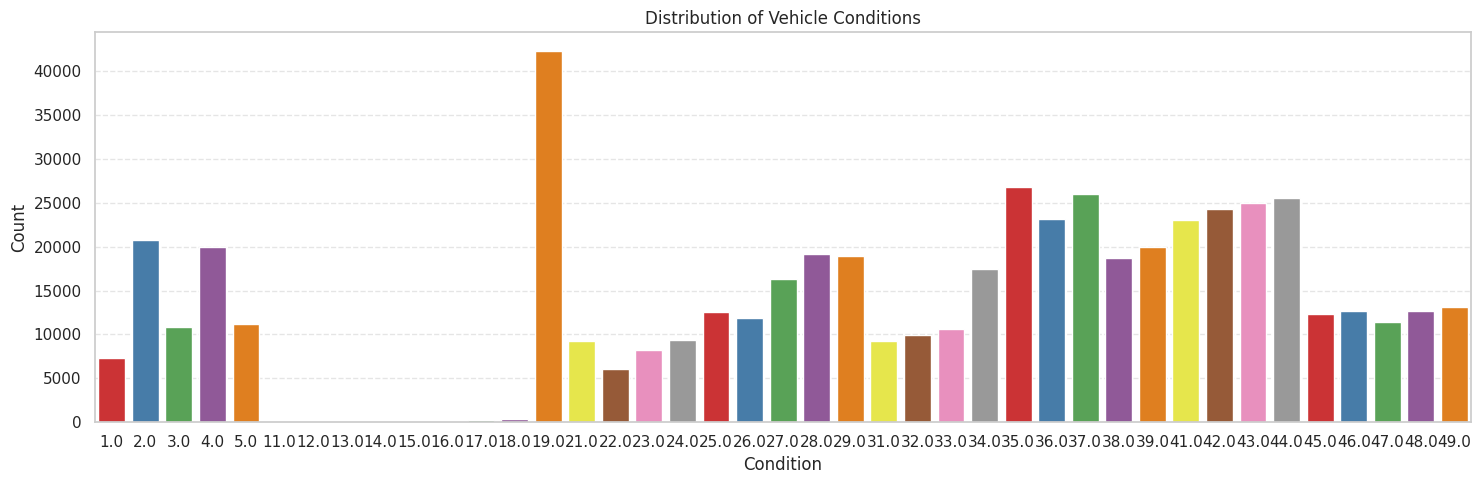

In [ ]:
# df['condition'].fillna('', inplace=True)

# Plot for 'condition'
plt.figure(figsize=(15, 5))
sns.countplot(x='condition', data=df,palette='Set1',hue='condition',legend=False)
plt.title('Distribution of Vehicle Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### **Why was this specific chart chosen?**

*  A countplot is ideal when the variable is discrete numeric and we want to see how many vehicles fall into each condition value.

*  It visually highlights how frequent or rare each specific condition score is.

*  It works well with palette='Set1' and hue='condition' to make bars easily distinguishable by condition values.



##### **What is/are the key insight(s) from the chart?**

*  There are visible spikes in condition values like 2.0, 4.0, 5.0, 19.0, and in the 30s and 40s.

The data shows multiple condition rating scales:

*  Some cars are rated between 1.0–5.0, likely on a standard condition scale.

*  Others show scores like 19.0, 33.0, 44.0, which are likely from a 0–50 or 0–100 scale.

*  This indicates inconsistency in how condition scores were entered.



##### **Will the gained insights help in creating a positive business impact?**

Yes:

*  It helps detect data quality issues — multiple scales can confuse both end-users and machine learning models.

Knowing condition clusters helps:

*  Optimize car listings (e.g., flagging excellent condition cars)

*  Build better price prediction models that include condition as a key feature

*  Enable more accurate filters on car resale platforms



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes:

*  Inconsistent or incorrect condition values (e.g., 19.0, 44.0) can:

Skew your insights

*  Lead to mispriced cars or misleading condition tags

*  Damage customer trust if someone expects a “4.0” car and gets one rated “40” on a different scale

####**Chart 6 - Top 10 sellers**

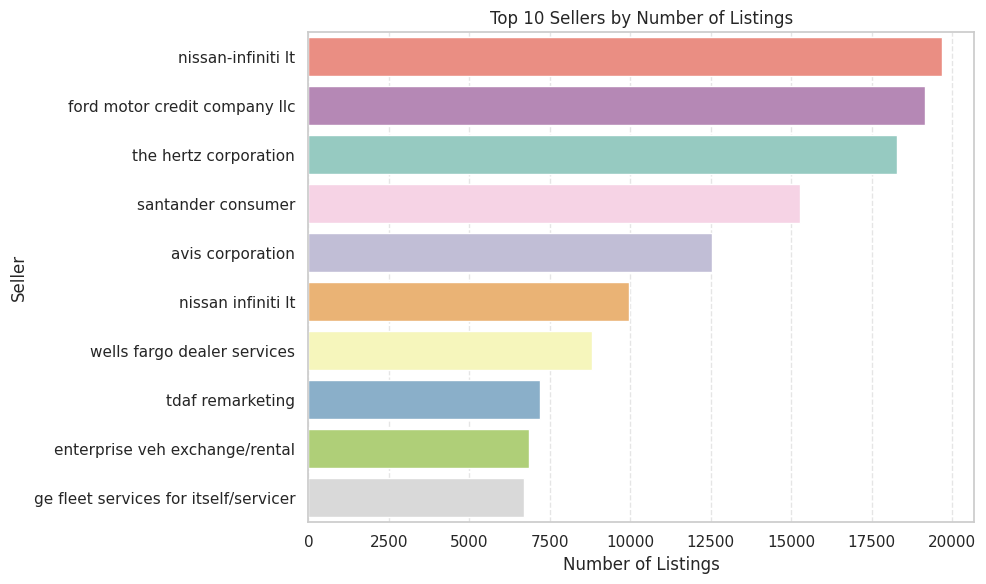

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='seller', data=df_top_sellers, order=top_sellers, hue='seller', palette='Set3', legend=False)
plt.title('Top 10 Sellers by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Seller')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### **Why was this specific chart chosen?**

*  A horizontal bar chart is perfect to represent categorical variables with long text (like seller names).

*  It makes it easier to compare frequencies of each seller.

*  Focusing on the top 10 avoids clutter and highlights the key players in the market.



##### **What is/are the key insight(s) from the chart?**

*  "nissan-infiniti lt", "ford motor credit company llc", and "the hertz corporation" are the top 3 sellers with ~19,000+ listings each.

*  The top 5 sellers alone contribute to a very large share of total listings, showing a concentration of listings among big players.

*  Some seller names appear repeated or slightly varied, like:

"nissan-infiniti lt" and "nissan infiniti lt" → likely duplicates due to inconsistent naming.



##### **Will the gained insights help in creating a positive business impact?**

Yes, absolutely:

*  Helps identify top-performing sellers, which is key for:

*  Strategic partnerships

*  Market analysis

*  Focused marketing or onboarding campaigns

*  Detecting duplicate seller names allows cleaner grouping, which leads to more accurate analysis and model features.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes, if left unaddressed:

*  Duplicate seller names dilute insights — the same seller appears more than once, leading to inaccurate counts.

*  Over-reliance on a few top sellers might indicate vulnerability — if any top seller exits or underperforms, it may significantly impact business metrics.



###**Univariate Analysis - Numerical Feature**

####**Chart 7 - Sales of car in years**

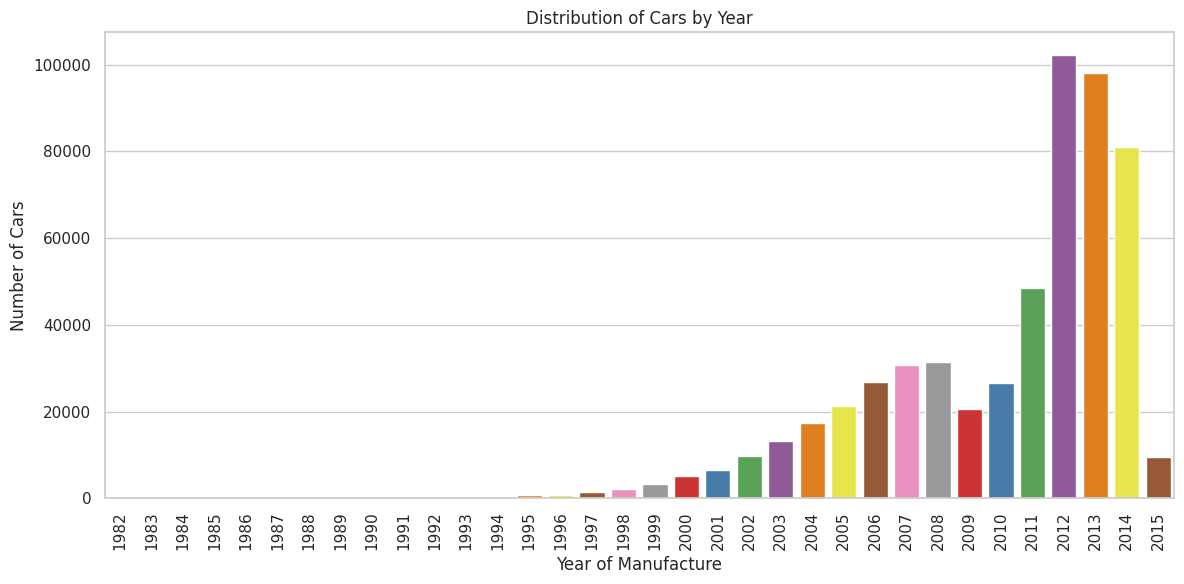

In [ ]:
# Univariate anaysis of year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, order=sorted(df['year'].dropna().unique()),palette='Set1',legend=False,hue='year')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **Why was this specific chart chosen?**

*  A bar chart is best suited to visualize how the number of cars varies across discrete year values.

*  It clearly shows temporal trends over time, which is ideal when analyzing production or sale patterns by manufacturing year.

##### **What is/are the key insight(s) from the chart?**

*  Car counts increase significantly after 2005, peaking between 2011 and 2014.

*  The year 2012 has the highest number of cars (~100K+), followed by 2013 and 2014.

*  Very few listings are from before the year 2000 — older vehicles are rare in the dataset.

*  The sharp drop in 2015 may be due to data cutoff or incomplete records for that year.

##### **Will the gained insights help in creating a positive business impact?**

Yes, for multiple use cases:

*  Helps inventory managers focus on models post-2005, especially 2011–2014, for resale strategy.

*  Data scientists can filter out old and rare years to avoid noise in model training.

*  Highlights market preference for relatively newer vehicles, guiding pricing, promotion, and buy-back programs.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes, if ignored:

*  The presence of very old vehicles (1980s/1990s) might skew models or visualizations if not handled.

*  A potential data quality issue is visible for 2015, which has surprisingly fewer entries — needs investigation (e.g., was the data collected mid-2015?).



**Univariate Analysis of MMR**

**Plot Used -** Histogram

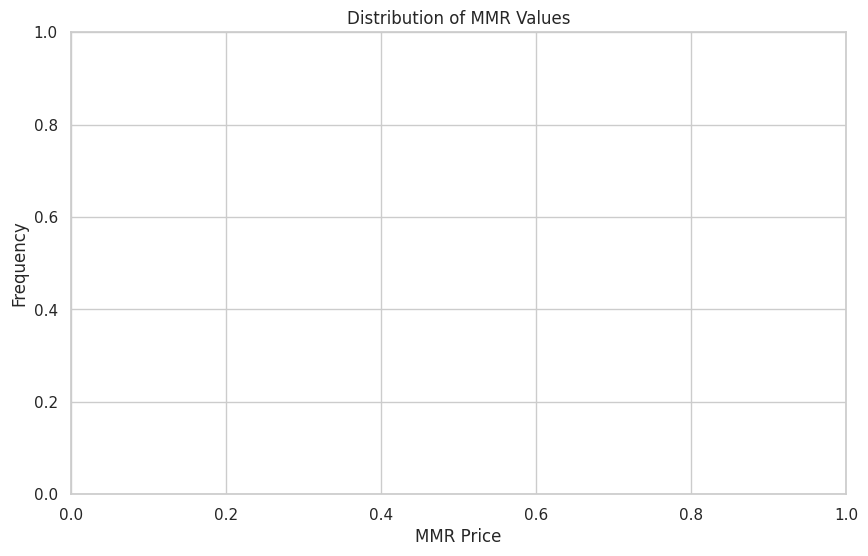

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['mmr'], bins=30, color='steelblue')
plt.title('Distribution of MMR Values')
plt.xlabel('MMR Price')
plt.ylabel('Frequency')
plt.show()

#### **Chart 8 -Odometer Readings**

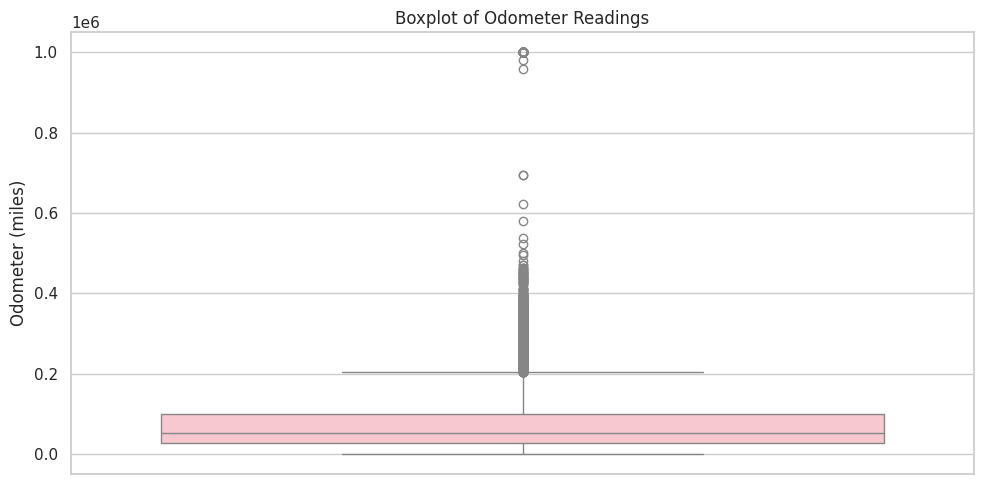

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='odometer', data=df, color='pink')
plt.title('Boxplot of Odometer Readings')
plt.ylabel('Odometer (miles)')
plt.tight_layout()
plt.show()


##### **Why was this specific chart chosen?**

*  A boxplot is perfect to show the distribution and spread of a continuous variable like odometer (mileage).

*  It helps easily identify outliers, median, and interquartile range (IQR), making it ideal for detecting anomalies in mileage.

##### **What is/are the key insight(s) from the chart?**

*  The median mileage appears to be under 100,000 miles, which is expected for used cars.

*  There are many extreme outliers, with some readings above 500,000 and even close to 1 million miles.

*  The majority of the data falls under 200,000 miles, beyond which it’s mostly outliers.

*  The distribution is right-skewed, showing most vehicles have relatively lower usage.



##### **Will the gained insights help in creating a positive business impact?**

Yes, absolutely:

*  Helps identify and handle outliers — extremely high odometer values may indicate data entry issues or unusual vehicle usage (e.g., taxis, delivery vans).

*  Allows better price prediction models — mileage has strong negative correlation with car value.

*  Assists in filtering or capping data to focus on typical resale range (e.g., < 250,000 miles).



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes, if ignored:

*  Outliers can distort statistical measures, like mean and standard deviation.

*  Can lead to biased machine learning models, especially if extreme values are not handled or scaled properly.

*  May signal potential fraud or incorrect data entry, which could mislead buyers or pricing engines.



##**7.1. Bivariate Analysis**

###**Bivariate Analysis - Numerical vs Numerical**

####**Chart 9 - Year Vs Selling price**

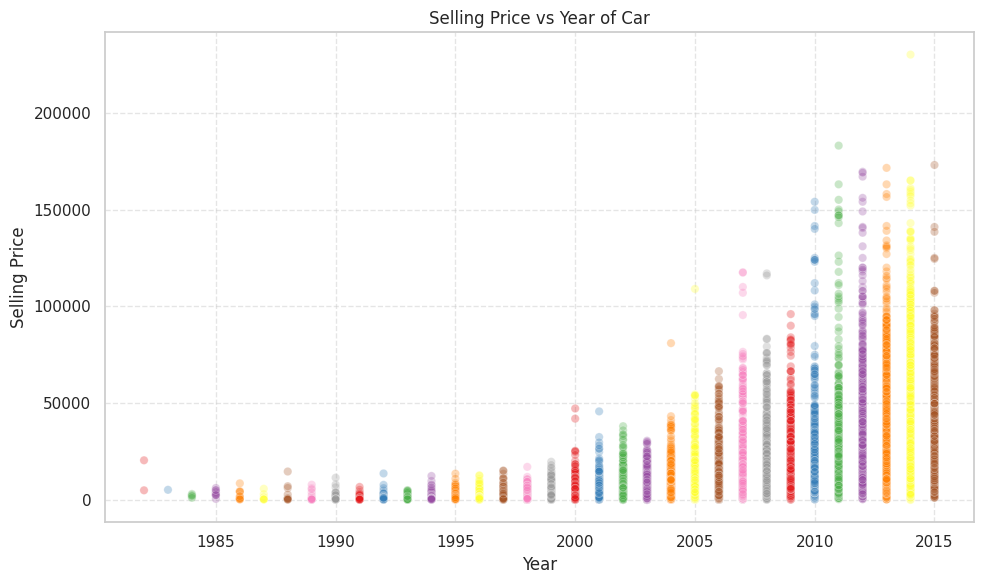

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='sellingprice', alpha=0.3,hue='year', palette='Set1', legend=False)
plt.title('Selling Price vs Year of Car')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### **Why the specific chart was picked?**

A scatter plot is ideal when visualizing the relationship between two continuous numerical variables — in this case:

year (of manufacture) vs

sellingprice (car price)

This helps spot patterns like trends, clusters, or outliers across time.

##### **What is/are the key insight(s) from the chart?**

*  There is a clear upward trend: Newer cars tend to have higher selling prices.

*  Cars before 2000 mostly sell under ₹50,000.

*  Cars manufactured between 2010–2015 show wider price dispersion, with some exceeding ₹200,000, indicating inclusion of luxury or premium models.

*  Outliers exist, especially after 2010 — likely high-end vehicles or data issues.



##### **Will the gained insights help in creating a positive business impact?**

Positive Impact:
*  The company can prioritize newer models (2010+) for higher profitability, as these fetch better selling prices.

*  Marketing can focus on premium listings in the recent-year segment.

*  Buying team can emphasize acquiring newer inventory.



##### **Are there any insights that lead to negative growth? Justify with reason.**

*  Older cars (before 2000) yield very low resale value, so focusing on acquiring or retaining them may lead to inventory stagnation or losses.

#### **Chart 10 - Odometer vs Sp**


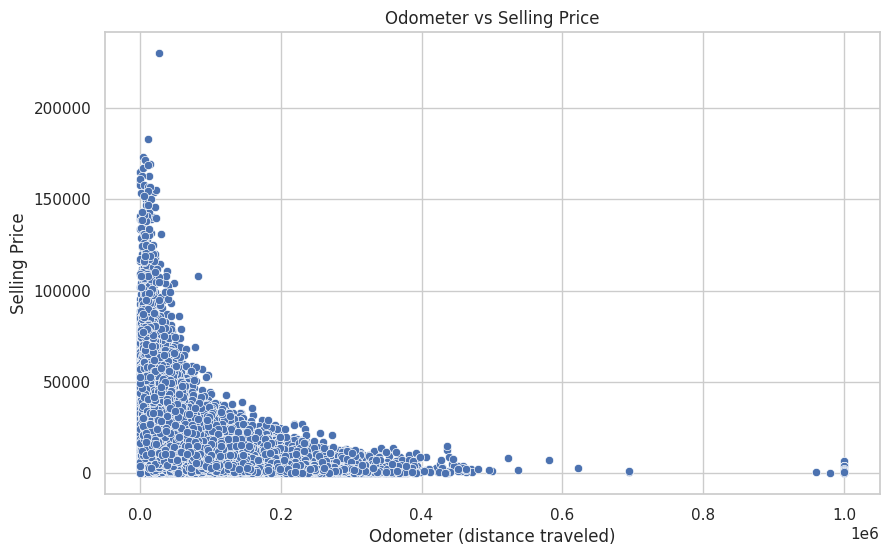

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df,)
plt.title('Odometer vs Selling Price')
plt.xlabel('Odometer (distance traveled)')
plt.ylabel('Selling Price')
plt.show()

##### **Why the specific chart was picked?**

We used a scatter plot because we are analyzing the relationship between two continuous numerical variables: odometer (distance traveled) and selling price. Scatter plots are ideal for visualizing trends, clusters, and correlations between such variables.



##### **What is/are the key insight(s) from the chart?**

There is a strong negative correlation:
As the odometer reading increases, the selling price significantly decreases.
Cars with very low mileage (under 50,000 miles) tend to have a wider range of prices, including high-end values.
As mileage increases beyond 100,000 miles, prices sharply drop and remain low.

##### **Will the gained insights help in creating a positive business impact?**

This insight is crucial for used car dealerships and pricing strategies:

*  Cars with lower mileage can be priced at a premium.

*  High-mileage cars will need to be discounted to remain competitive.

*  Helps in targeting ads and negotiation tactics for buyers.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes — high odometer readings are a negative indicator for pricing:

*  Listings with high mileage will likely stay longer in inventory or sell at lower margins.

*  Dealers must consider reconditioning costs or offer warranty incentives to sell such cars faster.



#### **Chart 11 - MMR vs Selling price**


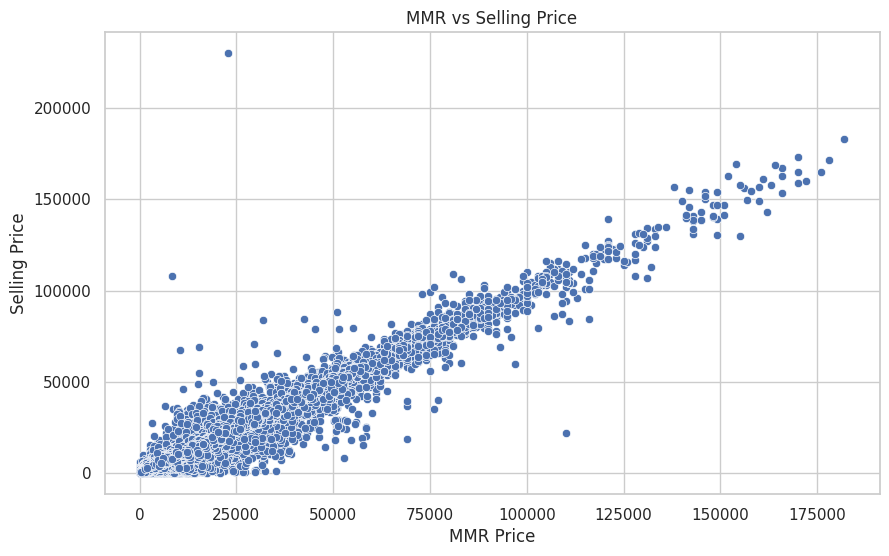

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mmr', y='sellingprice', data=df)
plt.title('MMR vs Selling Price')
plt.xlabel('MMR Price')
plt.ylabel('Selling Price')
plt.show()


##### **Why the specific chart was picked?**

A scatter plot is ideal here because we’re comparing two continuous numerical variables — MMR (Manheim Market Report price estimate) and the actual selling price. The goal is to check the correlation and prediction alignment between them.

##### **What is/are the key insight(s) from the chart?**

There is a strong positive linear correlation:

*  As the MMR increases, the selling price also increases proportionally.

*  Most points are clustered along a straight upward line, indicating that the market price is a strong predictor of actual sale price.

*  Some outliers exist, where cars were sold at significantly lower or higher prices than the MMR.


##### **Will the gained insights help in creating a positive business impact?**

This correlation can be used for:

*  Accurate pricing strategies: Dealerships can confidently use MMR to set competitive selling prices.

*  Inventory valuation: Helps in predicting profit margins based on purchase vs sale price.

*  Market trend analysis: Enables understanding if the market is overpaying or underpaying compared to standard benchmarks.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes — deviation from MMR can lead to unrealized revenue or loss:

*  Cars sold far below MMR reflect underpricing, causing revenue loss.

*  Cars priced well above MMR may remain unsold longer, affecting inventory turnover and incurring holding costs.



###**Bivariate Analysis  - Categorical Vs Numerical**

####**Chart 12 - Make vs Selling price**

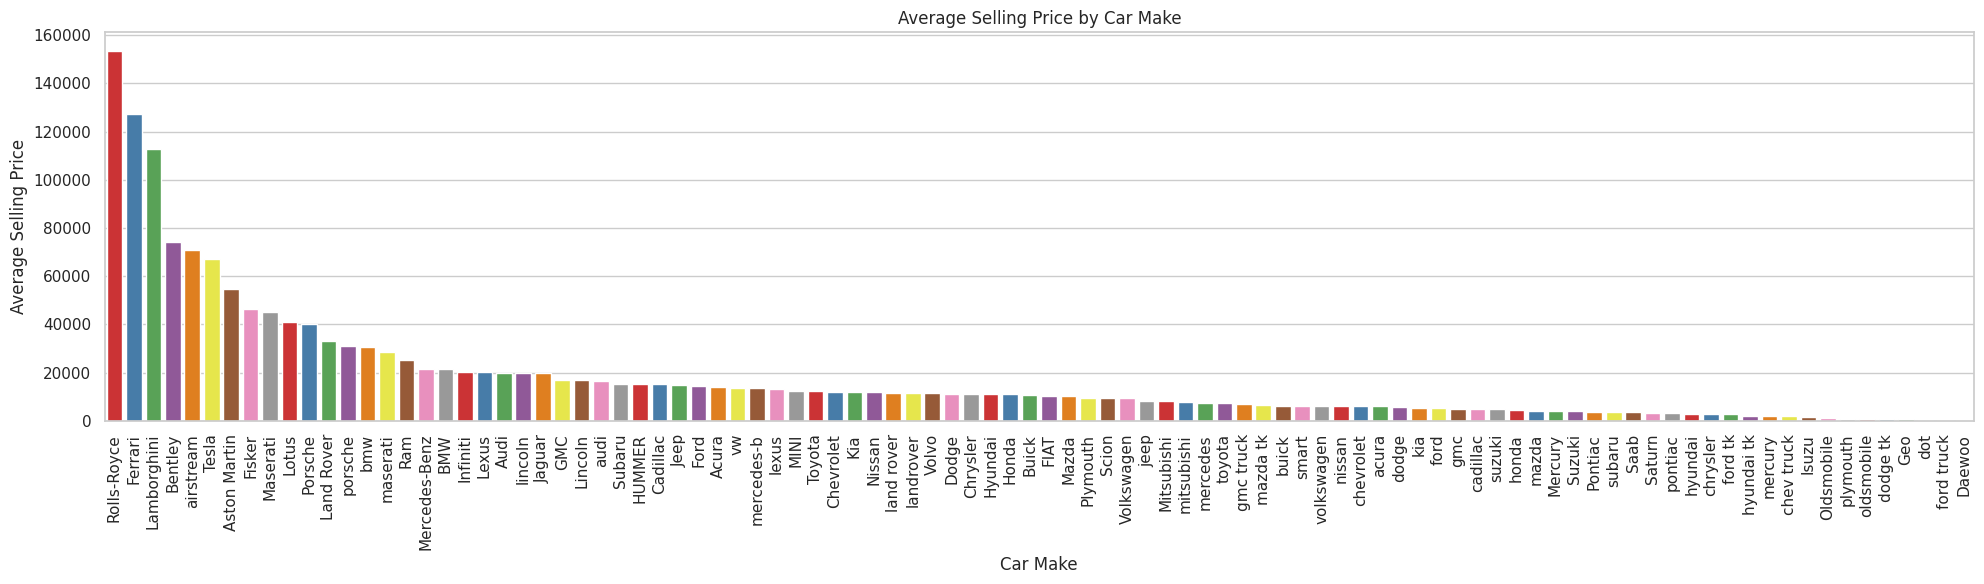

In [12]:
# Convert to DataFrame for hue compatibility
avg_price_df = avg_price.reset_index()
avg_price_df.columns = ['make', 'avg_selling_price']

plt.figure(figsize=(20, 6))
sns.barplot(data=avg_price_df, x='make', y='avg_selling_price', palette='Set1', hue='make', legend=False)

plt.xticks(rotation=90)
plt.title('Average Selling Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Selling Price')
plt.tight_layout()
plt.show()



##### **Why the specific chart was picked?**

A bar plot is ideal here because it clearly visualizes the average selling price across different car makes, making it easy to compare brands in a sorted order.

##### **What is/are the key insight(s) from the chart?**

*  olls-Royce, Ferrari, Lamborghini, and Bentley have the highest average selling prices, indicating these are premium or luxury brands.

*  On the other hand, brands like Daewoo, Geo, Dodge, and Oldsmobile have significantly lower average prices, possibly due to brand value, market segment, or vehicle age.

*  There's a sharp price drop after the top 5 brands, suggesting a skewed distribution.



##### **Will the gained insights help in creating a positive business impact?**

Yes, it helps in:

*  Pricing Strategy: Dealerships can set realistic pricing strategies based on brand expectations.

*  Inventory Decisions: Helps identify high-value brands that might offer better profit margins or market appeal.

*  Customer Targeting: Knowing which brands cater to luxury buyers versus budget customers allows for segmented marketing.



##### **Are there any insights that lead to negative growth? Justify with reason.**

*  Low average prices for brands like Daewoo or Geo might indicate low resale value, which can discourage trade-ins or investments in these brands.

*  These brands could also imply higher depreciation, making them less attractive to investors or dealers focusing on value retention.

#### **Chart 13 - Number of Cars by Year and Transmission**

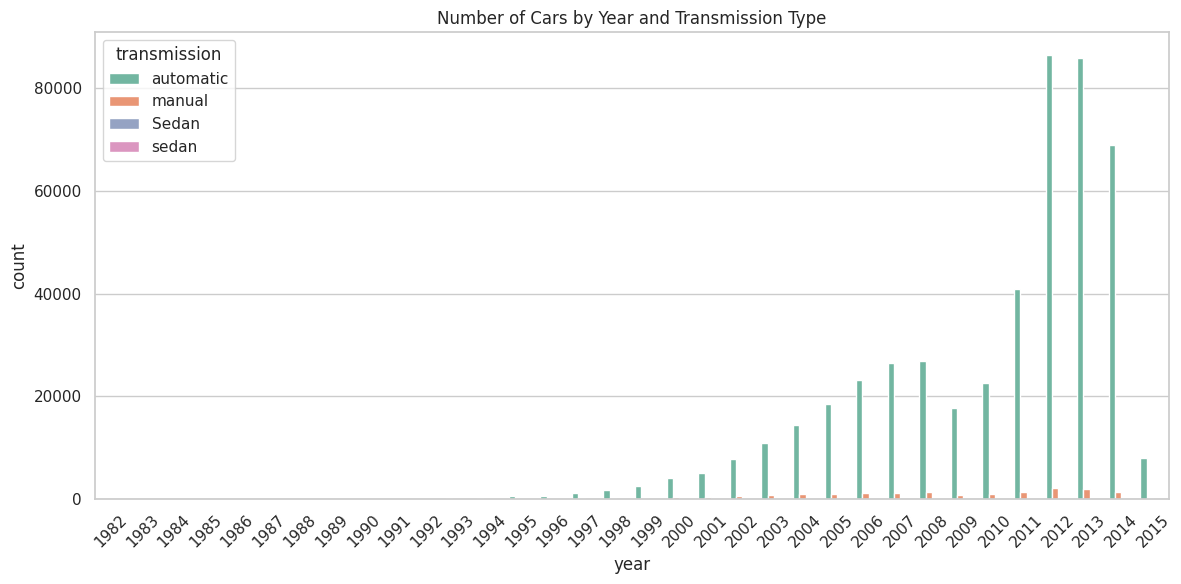

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="year", hue="transmission", data=df, palette="Set2")
plt.title("Number of Cars by Year and Transmission Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### **Why the specific chart was picked?**

A grouped bar plot was chosen because it clearly shows how the number of cars of each transmission type (manual, automatic, etc.) has changed over different years, making it easy to compare category-wise counts across time.

##### **What is/are the key insight(s) from the chart?**

*  Automatic transmission cars dominate the dataset by a huge margin, especially after the year 2005.

*  The share of manual cars is significantly lower and almost stagnant.

*  Some inconsistent entries like "Sedan" and "sedan" appear in the transmission column, which are not actual transmission types — indicating data entry issues.

##### **Will the gained insights help in creating a positive business impact?**

*  Understanding the dominant transmission type helps dealerships or used car platforms stock more in-demand cars.

*  It also helps target marketing (e.g., focus more on automatic cars if most customers prefer them).

*  Identifying incorrect or inconsistent entries allows cleaning data, leading to more reliable model training and pricing predictions.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes:

*  The presence of values like "Sedan" and "sedan" in the transmission column is clearly incorrect, which may negatively impact:

*  Model accuracy in ML,

*  Customer search experience, and

*  Overall data integrity.

Fixing these values is essential to ensure proper grouping and analysis.

#### **Chart 14 - Selling Price Distribution by Transmission**

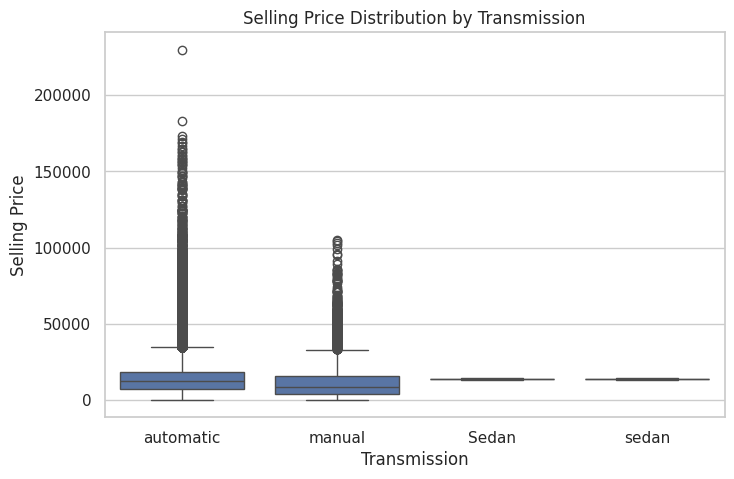

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='transmission', y='sellingprice', data=df)
plt.title('Selling Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

##### **Why the specific chart was picked?**

A boxplot was chosen to visualize the distribution of selling prices across each transmission type. It highlights the median, interquartile range (IQR), and outliers, making it perfect to compare price spread and central tendency among categories.



##### **What is/are the key insight(s) from the chart?**

*  Automatic transmission cars have a higher median selling price than manual ones.

*  There's a wider spread and more outliers in both automatic and manual types, indicating variable pricing based on other features (make, model, etc.).

*  Categories like "Sedan" and "sedan" again appear under transmission, but they have a very tight range of prices, suggesting incorrect or misclassified entries.



##### **Will the gained insights help in creating a positive business impact?**

*  Buyers are likely willing to pay more for automatic cars — this insight helps with inventory decisions and price forecasting.

*  Knowing price dispersion helps dealers set competitive pricing and identify underpriced or overpriced vehicles.

*  The presence of mislabeled entries can confuse pricing models, reduce customer trust, and hurt platform credibility — fixing this ensures better user experience and clean analytics.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes:

*  Incorrect entries like “Sedan” and “sedan” in the transmission column:

*  Skew category-wise pricing insights,

*  Mislead price prediction models,

*  Cause faulty filtering on car listing platforms.

These must be cleaned or removed to avoid misleading analysis and business decisions.



#### **Chart 15 - Distribution of transmission vs odometer**

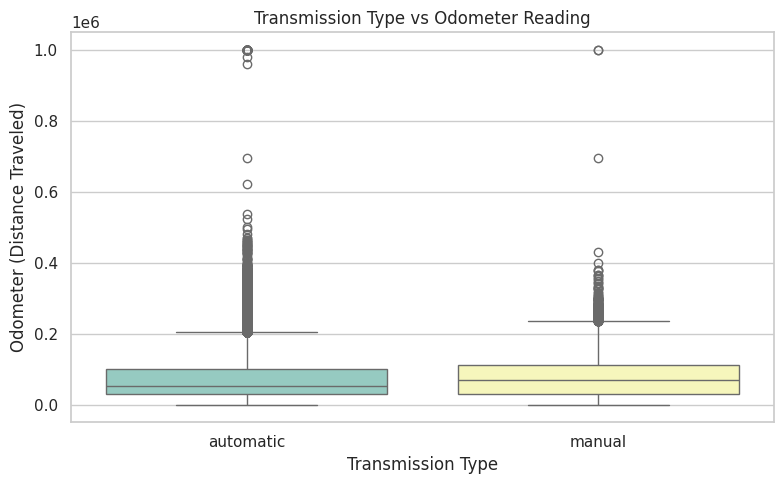

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_trans, x='transmission', y='odometer', hue='transmission', palette='Set3', legend=False)
plt.title('Transmission Type vs Odometer Reading')
plt.xlabel('Transmission Type')
plt.ylabel('Odometer (Distance Traveled)')
plt.tight_layout()
plt.show()


##### **Why the specific chart was picked?**

We chose a box plot because it's the best way to compare the distribution of odometer readings (numerical) across different transmission types (categorical). It clearly highlights the median, quartiles, and outliers, making it easy to compare central tendencies and spread.



##### **What is/are the key insight(s) from the chart?**

*  Both manual and automatic cars have a wide range of odometer readings.

*  Manual transmission cars tend to have a slightly higher median odometer reading.

*  There are many high-mileage outliers in both categories, but they are more concentrated in automatic cars.

##### **Will the gained insights help in creating a positive business impact?**

*  Inventory Planning: If manual cars typically have higher mileage, dealerships may need to adjust pricing or maintenance strategy accordingly.

*  Pricing Strategy: Automatic cars with lower median mileage might be more attractive to buyers, justifying a premium price.

*  Marketing: Sellers can highlight low-mileage automatic cars in promotions to appeal to customers looking for convenience and newer models.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes. The presence of many high-mileage outliers suggests that some vehicles have been used extensively, potentially raising concerns about wear and tear. If not communicated transparently, this could hurt customer trust or increase return rates.



###**Bivariate Analysis - Categorical vs Categorical**

#### **Chart 16 - Make vs transmission**

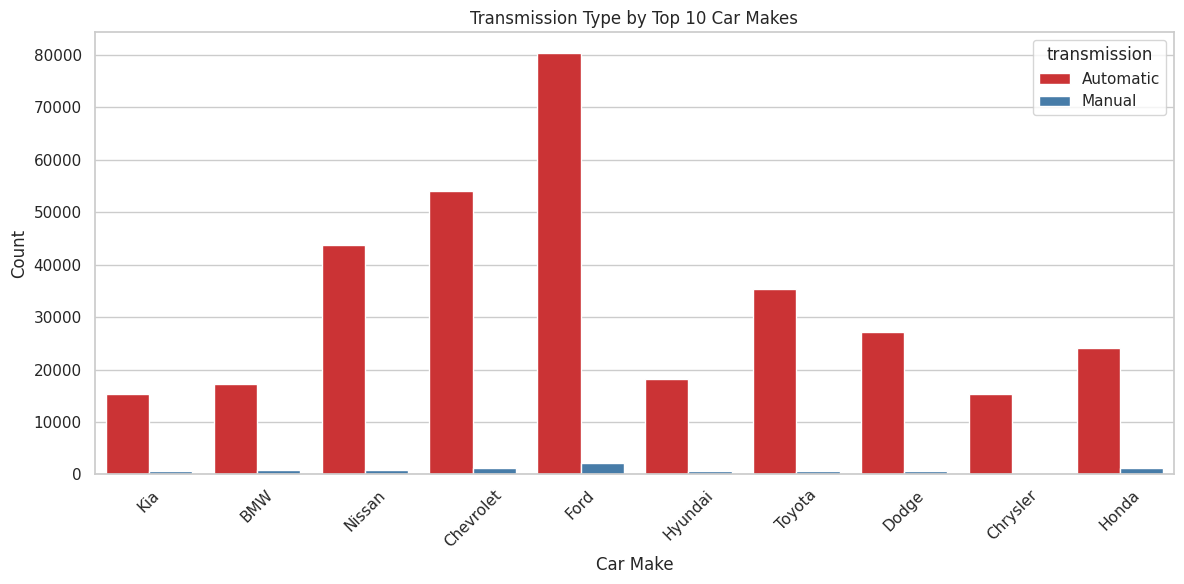

In [25]:
# Clean transmission column
df['transmission'] = df['transmission'].str.strip().str.title()

# Select top 10 most frequent car makes
top_makes = df['make'].value_counts().head(10).index
df_top_makes = df[df['make'].isin(top_makes)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_makes, x='make', hue='transmission', palette='Set1')
plt.title('Transmission Type by Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### **Why the specific chart was picked?**

We used a countplot with make on the x-axis and transmission as hue to compare the frequency of manual vs automatic cars across top 10 car brands. This helps us visually analyze which brands prefer which transmission type.

##### **What is/are the key insight(s) from the chart?**

*  Automatic transmission dominates across all major car makes.

*  Brands like Ford, Chevrolet, and Nissan have significantly higher volumes, mostly automatic.

*  BMW and Honda have slightly more presence of manual compared to others, though still a minority.

*  Manual transmission is consistently low, even for economy brands like Kia and Hyundai.



##### **Will the gained insights help in creating a positive business impact?**

*  Car dealerships should stock more automatic vehicles, especially from top brands like Ford, Chevrolet, and Nissan, as market demand and availability are aligned.

*  Helps in inventory optimization and efficient procurement strategy.




##### **Are there any insights that lead to negative growth? Justify with reason.**

*  The decline of manual transmissions suggests that any investment in training or marketing manual cars might yield lower ROI.

*  Brands or regions focusing too heavily on manual vehicles may experience lower sales velocity.


####**Chart 17 - Make vs Color**

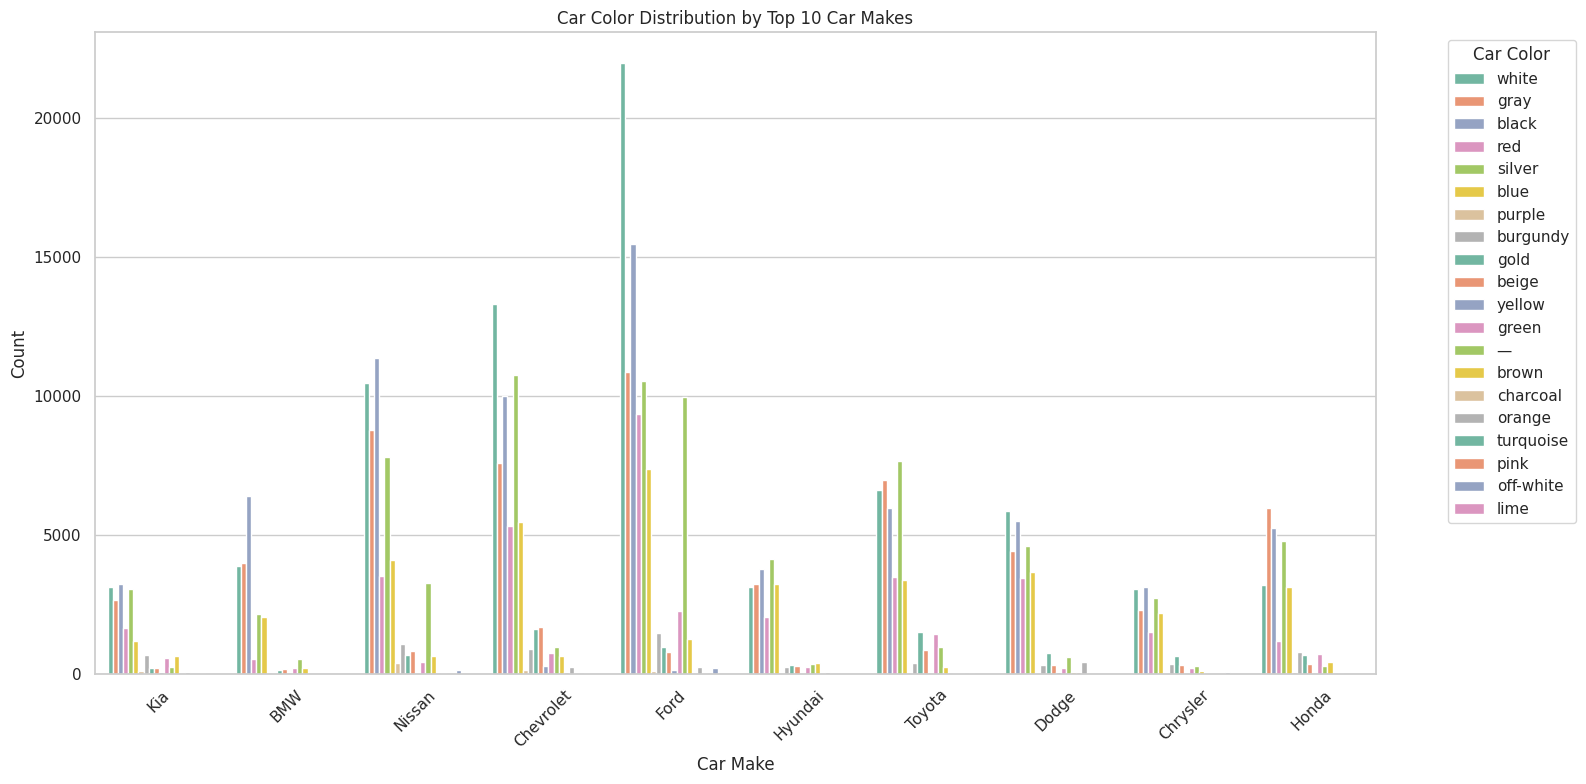

In [28]:
# Filter to top 10 car makes
top_makes = df['make'].value_counts().head(10).index
df_top = df[df['make'].isin(top_makes)]

plt.figure(figsize=(16, 8))
sns.countplot(data=df_top, x='make', hue='color', palette='Set2')

plt.title('Car Color Distribution by Top 10 Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



##### **Why the specific chart was picked?**

This grouped bar plot was chosen to compare car color distribution across top 10 car makes. Since both "make" and "color" are categorical variables, this visual allows us to:

*  See frequency counts side by side for each color within each car make.

*  Identify popular or dominant color trends per make.

*  Avoid color overcrowding that may happen in heatmaps or stacked bars.



##### **What is/are the key insight(s) from the chart?**

*  Ford, Chevrolet, and Nissan have the highest car counts among all makes.

*  White, black, gray, and silver are the most dominant colors across all brands.

*  Exotic colors (like pink, turquoise, lime, etc.) are very rare, appearing mostly in Ford and Chevrolet.

*  BMW prefers black and gray, reinforcing its premium brand perception.

##### **Will the gained insights help in creating a positive business impact?**

Yes, definitely:

*  Inventory Planning: Dealerships can stock more cars in high-demand colors (white, black, gray) for faster turnover.

*  Marketing Strategy: Brands can use these color preferences to design ads or highlight cars in the most popular colors.

*  Personalization: Car rental companies or resellers can prioritize repainting or acquiring vehicles in top-trending colors to improve resale potential.

##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes:

*  Overdependence on a few colors (like white or black) may reduce brand diversity appeal, especially for manufacturers like Hyundai or Chrysler.

*  Rare colors like lime, pink, or turquoise have minimal demand and may decrease resale value or increase holding time, which is a concern for used car dealers.



####**Chart 17 -**

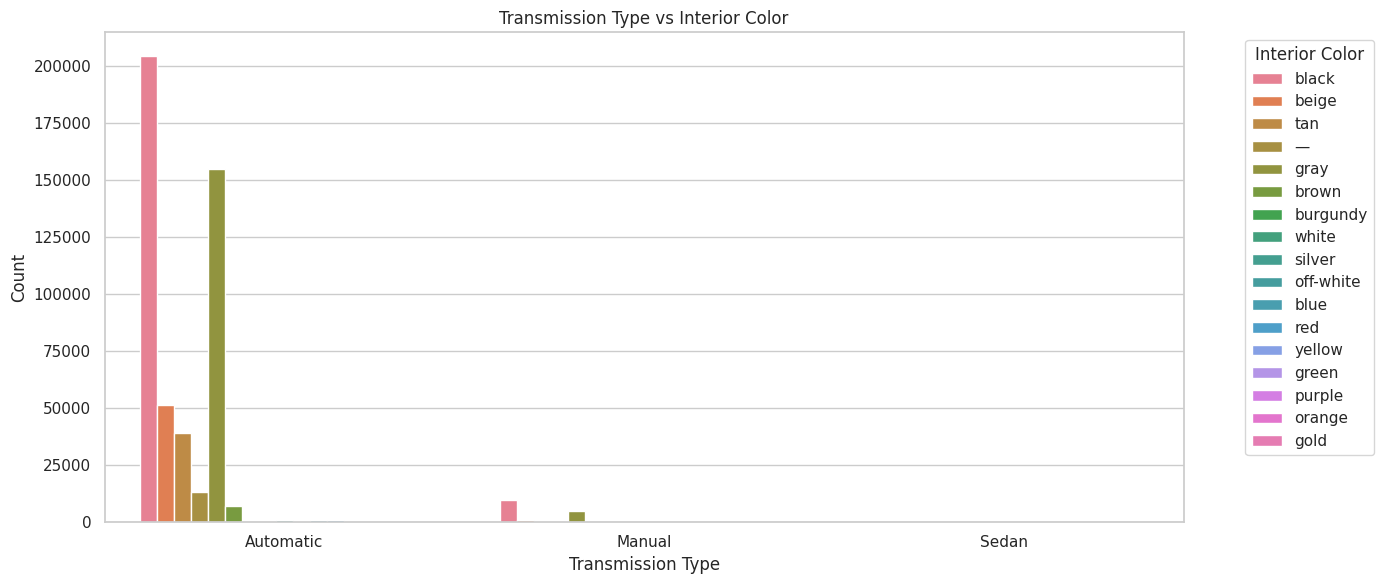

In [30]:
# Drop missing values in 'transmission' and 'interior' for clean plotting
df_trans_int = df[['transmission', 'interior']].dropna()

plt.figure(figsize=(14, 6))
sns.countplot(data=df_trans_int, x='transmission', hue='interior')
plt.title('Transmission Type vs Interior Color')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Interior Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### **Why was this specific chart chosen?**

A horizontal bar chart is ideal for showing the frequency distribution of categorical variables like car makes. Since there are many categories, horizontal bars provide better readability, especially for long labels like “Mercedes-Benz” or “Volkswagen”.

##### **What is/are the key insight(s) from the chart?**

*  Ford is the most frequently listed car make, followed by Chevrolet and Nissan.

*  These top 3 brands dominate the dataset in volume — each with over 50,000 listings.

*  There is a long tail of makes like Ram, Subaru, Buick, and Lincoln with significantly fewer listings.

*  “Unknown” also appears, suggesting some rows have missing or unclean make values.

##### **Will the gained insights help in creating a positive business impact?**

Yes:

Car marketplaces can prioritize Ford, Chevrolet, and Nissan for:

*  Optimizing inventory forecasting

*  Building custom recommendation systems

*  Launching targeted brand-based promotions or filters

*  Understanding most-listed brands helps in training better pricing models and customer trend analysis.



##### **Are there any insights that lead to negative growth? Justify with reason.**

Yes, potentially:

The presence of “Unknown” values in the make column signals data quality issues, which:

*  May affect brand-level analysis

*  Could lead to incorrect filtering or model misclassifications

*  Overreliance on a few brands might lead to overfitting in machine learning models, and neglecting niche opportunities from lower-volume brands like Subaru or Lincoln.

